## **Problem Set 1**: An Introduction

In this script, we will be working with the 'Boston' housing data which originates from MASS Library of R.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Boston.csv')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


1. Report the 'class' of the data set. How many rows and columns are in
this data set? What do the rows and columns represent?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


From the output above, we can see that there are 15 columns and 506 entries or rows. Here, each row is a set of observations corresponding to the ith suburb or town. Whereas each of the columns refer to a distinct feature (variable).
The columns are given as:


*   `crim` - per capita crime rate by town
*   `zn` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `indus` - proportion of non-retail business acres per town.
* `chas` - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* `nox` - nitrogen oxides concentration (parts per 10 million).
*   `rm` - average number of rooms per dwelling.
* `age` - proportion of owner-occupied units built prior to 1940.
* `dis` - weighted mean of distances to five Boston employment centres.
* `rad` - index of accessibility to radial highways
* `tax` - full-value property-tax rate per $10,000
* `ptratio` - pupil-teacher ratio by town.
* `black` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* `lstat` - lower status of the population (percent).
* `medv` - median value of owner-occupied homes in $1000s.

---



2. Create a smaller data set with the variables median value of owner-occupied
homes, per capita crime rate, nitrogen oxides concentration, proportion of
blacks and percentage of lower status of the population. Choosing median
value of owner occupied homes as the response and the rest as the predictors,
make scatter plots of the response versus each predictor. Present
the scatter plots in different panels of the same graph. Comment on your
findings.

In [ ]:
df_mini = pd.DataFrame(df,
                       columns = ['medv', 'crim', 'nox',
                                  'black', 'lstat'])
df_mini

,medv,crim,nox,black,lstat
0,24.0,0.00632,0.538,396.90,4.98
1,21.6,0.02731,0.469,396.90,9.14
2,34.7,0.02729,0.469,392.83,4.03
3,33.4,0.03237,0.458,394.63,2.94
4,36.2,0.06905,0.458,396.90,5.33
...,...,...,...,...,...
501,22.4,0.06263,0.573,391.99,9.67
502,20.6,0.04527,0.573,396.90,9.08
503,23.9,0.06076,0.573,396.90,5.64
504,22.0,0.10959,0.573,393.45,6.48


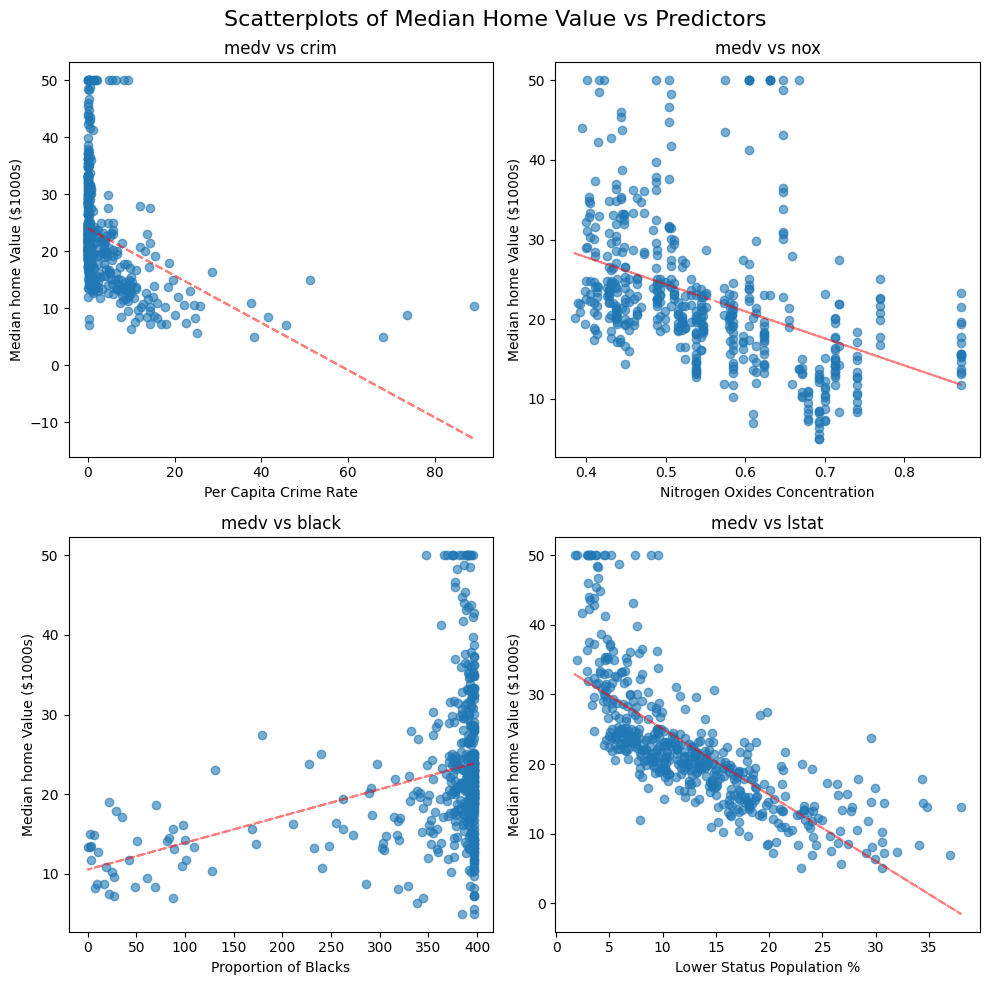

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Scatterplots of Median Home Value vs Predictors',
             fontsize = 16)
predictors = ['crim', 'nox', 'black', 'lstat']
titles = ['Per Capita Crime Rate', 'Nitrogen Oxides Concentration',
          'Proportion of Blacks', 'Lower Status Population %']
for i, (predictor, title) in enumerate(zip(predictors, titles)):
  row, col = i//2, i % 2
  axes[row, col].scatter(df_mini[predictor],
                         df_mini['medv'], alpha = 0.6)
  axes[row, col].set_xlabel(title)
  axes[row, col].set_ylabel('Median home Value ($1000s)')
  axes[row, col].set_title(f'medv vs {predictor}')

  z = np.polyfit(df_mini[predictor], df_mini['medv'], 1)
  p = np.poly1d(z)
  axes[row, col].plot(df_mini[predictor],
                      p(df_mini[predictor]), 'r--',
                      alpha = 0.5)
plt.tight_layout()
plt.show()

From the above scatter-plot matrix, we can see that: <br>
i) `medv`  is negatively correlated with `crim` i.e. as crime rate increases, the median home value decreases and vice versa.

ii) `medv` is moderately negatively correlated with `nox` i.e as the concentration of Nitrogen Oxides (a measure of air pollution) increases, home values generally decrease.

iii) `medv` is somewhat positively correlated with `black`.

iv) `medv` is strongly negatively correlated with `lstat` suggesting that it might be one of the best predictors for the `medv`.

---

3. Which suburb of Boston has lowest median value of owner-occupied homes?
What are the values of the other predictors mentioned in (2), for that
suburb. How do these values compare to the overall ranges for those predictors?
Comment on your findings. Hint: Mention which percentile these
values belong to.

In [ ]:
df_mini[df_mini['medv'].min() == df_mini['medv']]

,medv,crim,nox,black,lstat
398,5.0,38.3518,0.693,396.90,30.59
405,5.0,67.9208,0.693,384.97,22.98


In [ ]:
df_mini.describe()

,medv,crim,nox,black,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,0.554695,356.674032,12.653063
std,9.197104,8.601545,0.115878,91.294864,7.141062
min,5.000000,0.006320,0.385000,0.320000,1.730000
25%,17.025000,0.082045,0.449000,375.377500,6.950000
50%,21.200000,0.256510,0.538000,391.440000,11.360000
75%,25.000000,3.677083,0.624000,396.225000,16.955000
max,50.000000,88.976200,0.871000,396.900000,37.970000


In [ ]:
from scipy.stats import percentileofscore
variables = ['crim', 'nox', 'black', 'lstat']
suburb_values = df_mini[df_mini['medv'].min() == df_mini['medv']]
percentiles = [percentileofscore(df[var], suburb_values[var],
                                 kind = 'rank')/100
               for var in variables]
percentiles

[array([0.98814229, 0.99604743]),
 array([0.84486166, 0.84486166]),
 array([0.88142292, 0.34980237]),
 array([0.97826087, 0.89920949])]

In the light of our findings, we can see that there is not one but two suburbs that have the minimum value which is 5.00(in $1000s). The values of the predictors corresponding to the minimum median value have also been shown in the output. Furthermore, we also derived the percentiles for each of the predictor values corresponding to the minimum median value and they are as follows:<br>
i) **Suburb-1**

*   `crim`: 98.81%
*   `nox`: 84.49%
*   `black`: 88.14%
*   `lstat`: 97.93%



ii) **Suburb-2**

*   `crim`: 99.60%
*   `nox`: 84.49%
*   `black`: 34.98%
*   `lstat`: 89.92%

---


4. Does any suburb of Boston stand out for having notably high crime rates,
tax rates, or pupil–teacher ratios? Hint: Use a boxplot to detect any
outliers. If so, identify the suburbs that show the outlier values.

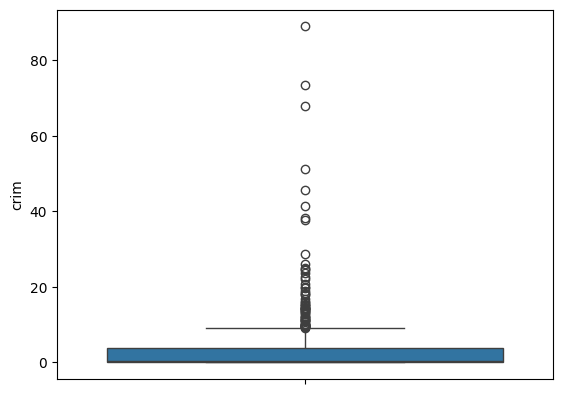

In [ ]:
import seaborn as sns
sns.boxplot(data = df['crim'])
plt.show()

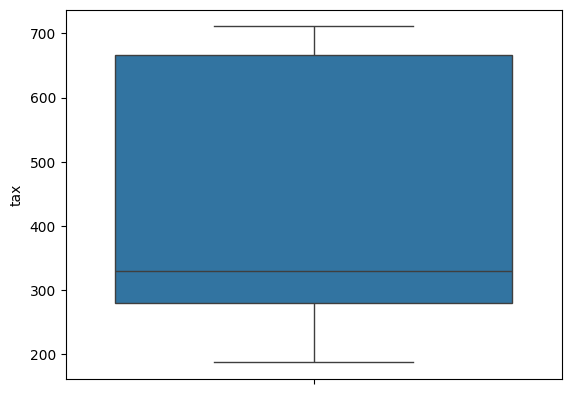

In [ ]:
sns.boxplot(data = df['tax'])
plt.show()

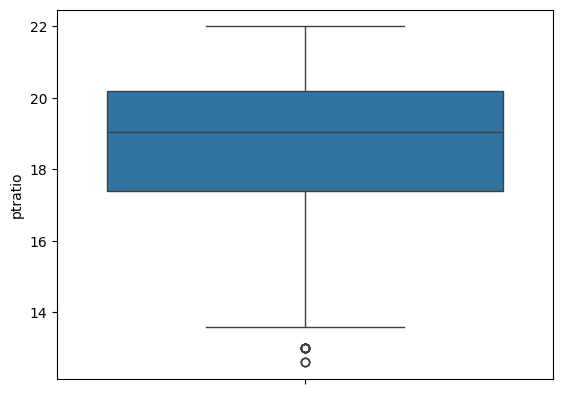

In [ ]:
sns.boxplot(data = df['ptratio'])
plt.show()

As we can see from the boxplots, some suburbs exhibit extremely high crime rates and some suburbs also show unusually high tax rates and pupil–teacher ratios. Hence, these outliers may strongly influence predictive models and should be handled carefully.

---